In [1]:
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=8d099fd050e3128c8572f1f24d5ba97e271f6921da644ba1e48d064840d205d7
  Stored in directory: /Users/astona/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
!pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=43267dd0186d8f7eb532d70c38e0e941cc19c82f25b125029ee7946aa089b0b4
  Stored in directory: /Users/astona/Library/Caches/pip/wheels/7e/d5/f4/f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=ab5cc194bbc058ecd38da68611ac43ef186d0de009b6f128f32019331961af84
  Stored in directory: /Users/astona/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [4]:
import yfinance as yf

In [23]:
tesla = yf.Ticker("TSLA")

In [24]:
gamestop = yf.Ticker("GME")

In [25]:
tesla_info=tesla.info
tesla_share_price_data = tesla.history(period="max")

<AxesSubplot:xlabel='Date'>

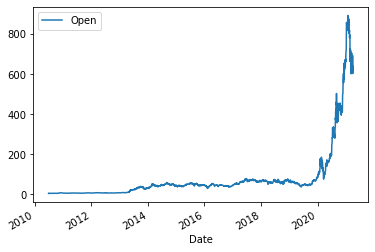

In [26]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

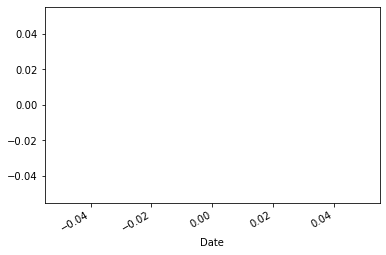

In [27]:
tesla.dividends.plot()

In [28]:
gamestop_info=tesla.info
gamestop_share_price_data = tesla.history(period="max")

<AxesSubplot:xlabel='Date'>

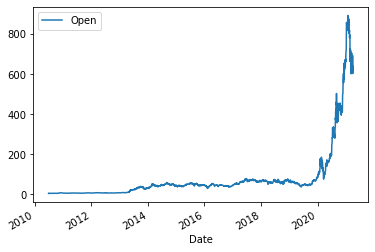

In [29]:
gamestop_share_price_data.reset_index(inplace=True)
gamestop_share_price_data.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

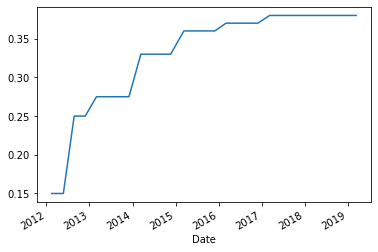

In [30]:
gamestop.dividends.plot()

### scraping

In [31]:
tesla_url = 'https://finance.yahoo.com/quote/TSLA/history?p=TSLA'
tesla_data  = requests.get(tesla_url).text
tesla_soup = BeautifulSoup(tesla_data,"html5lib")
tesla_table = tesla_soup.find('table') # in html table is represented by the tag <table>

In [32]:
tesla_df = pd.read_html(str(tesla_table))[0]


In [34]:
tesla_df['Volume'].tail()

96                                              17357700
97                                              30284200
98                                              34833000
99                                              21706000
100    *Close price adjusted for splits.**Adjusted cl...
Name: Volume, dtype: object

In [19]:
gamestop_url = 'https://finance.yahoo.com/quote/GME/history?p=GME'
gamestop_data  = requests.get(gamestop_url).text
gamestop_soup = BeautifulSoup(gamestop_data,"html5lib")
gamestop_table = gamestop_soup.find('table') # in html table is represented by the tag <table>
gamestop_df = pd.read_html(str(gamestop_table))[0]


In [20]:
gamestop_df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 01, 2021",193.36,196.97,183.60,191.45,191.45,9303700
1,"Mar 31, 2021",197.50,199.46,187.11,189.82,189.82,8393800
2,"Mar 30, 2021",187.50,204.30,182.00,194.46,194.46,17094900
3,"Mar 29, 2021",180.75,193.92,173.51,181.30,181.30,10042200
4,"Mar 26, 2021",197.68,218.93,163.26,181.00,181.00,37371900


In [35]:
gamestop_df['Volume'].tail()

96                                               4882600
97                                               3826000
98                                               6244900
99                                               5518200
100    *Close price adjusted for splits.**Adjusted cl...
Name: Volume, dtype: object